# **<p style="font-family:newtimeroman;font-size:200%;text-align:center;color:#12635d;">Precision-focused ML for Email Spam Detection: NLP Classification</p>**

## ***Aim and Goal:***
### ***The primary aim was to develop an effective email spam detection system using Natural Language Processing (NLP) techniques followed by machine learning model training. The main goal was to optimize the precision metric, prioritizing the accurate identification of spam emails while minimizing false positives.***

## ***Importance of Precision in Evaluation:***
### ***The evaluation matrix includes various performance metrics such as accuracy, precision, recall, and F1-score, among others. However, particular attention was given to precision due to its significance in spam detection. Precision measures the proportion of correctly identified spam emails among all emails classified as spam. Reducing false positives (legitimate emails classified as spam) is crucial to ensure that important messages are not overlooked or misclassified. Hence, optimizing precision helps maintain the integrity of the email inbox by minimizing the risk of filtering out legitimate emails.***

# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#12635d;">About Author</p>**
##  ***`Project:` Email Spam Detection***
## ***Introduction***
### 👋 Hello, everyone! My name is Om Tripathi, and I'm delighted to introduce myself to you. I am a Dynamic Bachelor of Computer Applications (BCA) student  
### From Dr. Virendra Swarup Institute Of Computer Studies, Kanpur, Uttar Pradesh.
## This is a group project and there are 2 team members in the team 
## 1. Ritesh Verma 
## 2. Om Tripathi

# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#12635d;">Import Libraries</p>**

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import re
import string
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
import emoji
from sklearn.preprocessing import LabelEncoder
import re
import joblib
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import * 
from sklearn.model_selection import train_test_split
 #ignore warnings   
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import joblib
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#12635d;">Loading Data</p>**

In [4]:
df = pd.read_csv('spam email dataset.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# Check Data Shape
df.shape

(5572, 2)

In [6]:
# Check Null Values
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [7]:
# Find Duplicate
df.duplicated().any()

np.True_

In [8]:
# drop Duplicates
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().any()

np.False_

# **<p style="font-family:newtimeroman;font-size:130%;text-align:center;color:#12635d;">Distribution of spam vs. ham</p>**
## ***Code working:***
## ***1. Calculate the count of each category:***

### ***- The `value_counts()` function is applied to the 'Category' column of the DataFrame `(df)` to count the occurrences of each unique label.***

## ***2. Plotting the pie chart:***

### ***- Create a new figure for the pie chart with a specified size using `plt.figure(figsize=(8, 8))`.***
### ***- Use `plt.pie()` to create the pie chart. It takes the category counts as input data, along with other parameters:***
#### ***- `labels=category_counts.index`: Assigns the unique category as pie chart categories.***
#### ***- `autopct='%1.1f%%'`: Formats the percentage display with one decimal place.***
#### ***- `startangle=140`: Sets the angle at which the pie chart starts.***

### ***- Set the title of the pie chart using `plt.title('Distribution of Spam vs. Ham')`.***
### ***- Use `plt.axis('equal')` to ensure the pie chart is drawn as a circle.***
### ***- Finally, display the pie chart using `plt.show()`.***

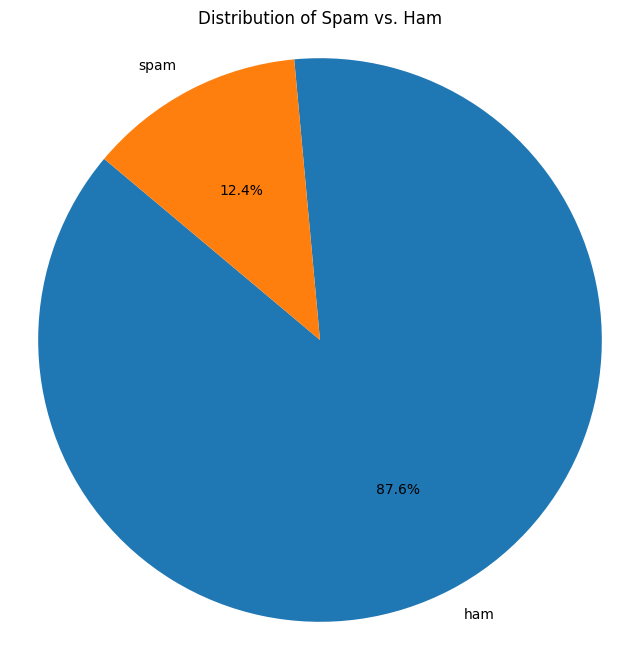

In [10]:
# Calculate the count of each label
category_counts = df['Category'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Spam vs. Ham')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Histogram Chart Visualization

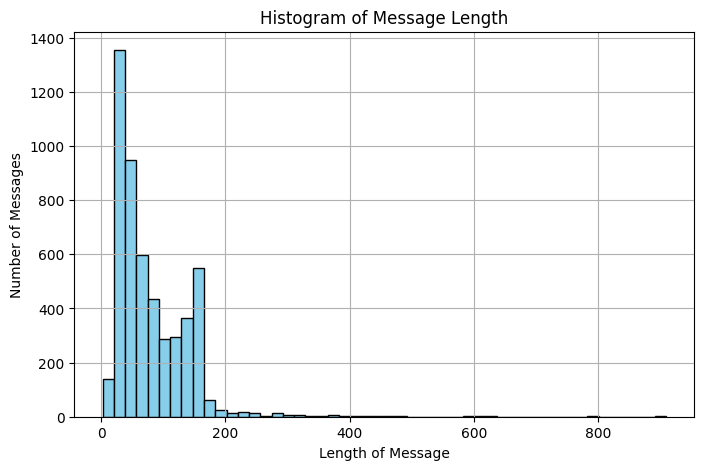

In [11]:
df['message_length'] = df['Message'].apply(len)

plt.figure(figsize=(8, 5))
plt.hist(df['message_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Message Length')
plt.xlabel('Length of Message')
plt.ylabel('Number of Messages')
plt.grid(True)
plt.show()

## Bar Chart Visualization

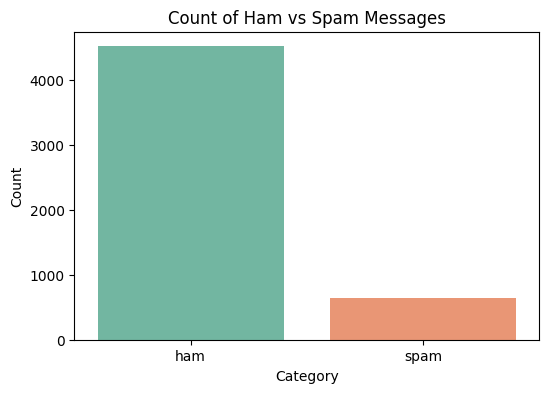

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Category', data=df, palette='Set2')
plt.title('Count of Ham vs Spam Messages')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

## Word Count Distribution

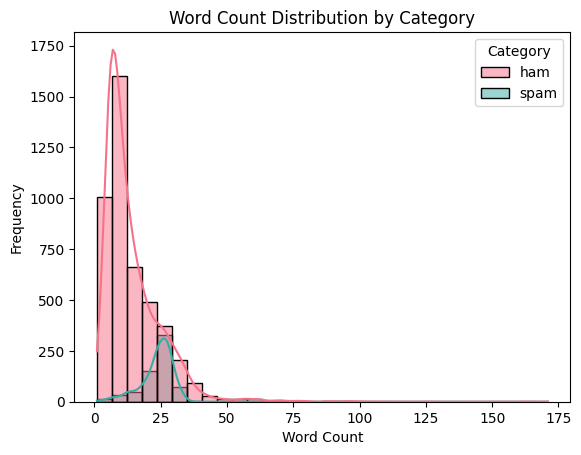

In [13]:
df['word_count'] = df['Message'].apply(lambda x: len(x.split()))
sns.histplot(data=df, x='word_count', hue='Category', bins=30, kde=True, palette="husl")
plt.title("Word Count Distribution by Category")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

## Character Count distribution 

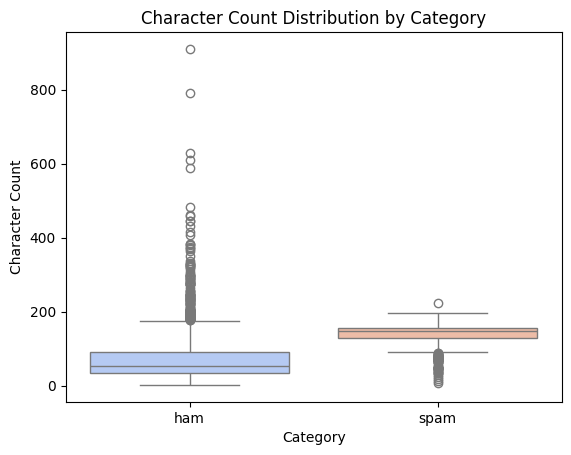

In [14]:
df['char_count'] = df['Message'].apply(len)
sns.boxplot(x='Category', y='char_count', data=df, palette="coolwarm")
plt.title("Character Count Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Character Count")
plt.show()

## Message sentiment analysis

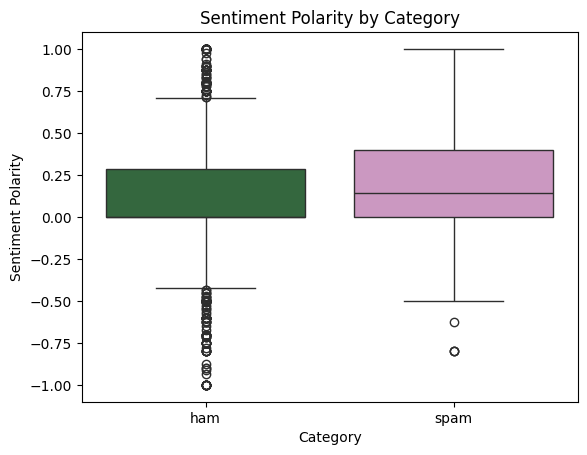

In [15]:
from textblob import TextBlob
df['sentiment_polarity'] = df['Message'].apply(lambda x: TextBlob(x).sentiment.polarity)
sns.boxplot(x='Category', y='sentiment_polarity', data=df, palette="cubehelix")
plt.title("Sentiment Polarity by Category")
plt.xlabel("Category")
plt.ylabel("Sentiment Polarity")
plt.show()

## Most common n grmas 

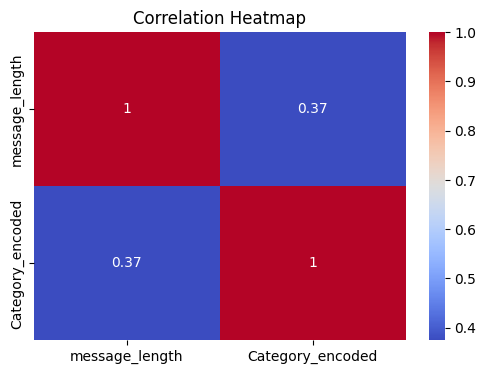

In [16]:
df['message_length'] = df['Message'].apply(len)
df['Category_encoded'] = df['Category'].map({'ham': 0, 'spam': 1})

correlation_data = df[['message_length', 'Category_encoded']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **<p style="font-family:newtimeroman;font-size:130%;text-align:center;color:#12635d;">Text Visualization</p>**
## ***Code working:***
### ***- `Iterate through unique categories`: This loop iterates through each unique category in the 'Category' column of the DataFrame `df`.***

### ***- `Filter the DataFrame for the current category`: Inside the loop, the code filters the DataFrame `df` to create a new DataFrame `filtered_df` containing only the rows where the 'Category' column matches the current category.***

### ***- `Concatenate all text data for the current category`: The code then concatenates all the text data from the 'Message' column of `filtered_df` into a single string variable named `text`.***

### ***- `Generate word cloud`: Using the concatenated text data `(text)`, the code generates a word cloud using the WordCloud module. The word cloud is configured to have a width of 800 pixels, a height of 400 pixels, and a white background.***

### ***- `Plot the word cloud`: Finally, the code plots the generated word cloud using Matplotlib. Each word's size in the word cloud is proportional to its frequency in the concatenated text data. The title of each word cloud plot includes the current category being processed. The `plt.axis('off')` command is used to hide the axes of the plot.***

### ***This process repeats for each unique category, generating a separate word cloud for each category based on the text data associated with that category.***

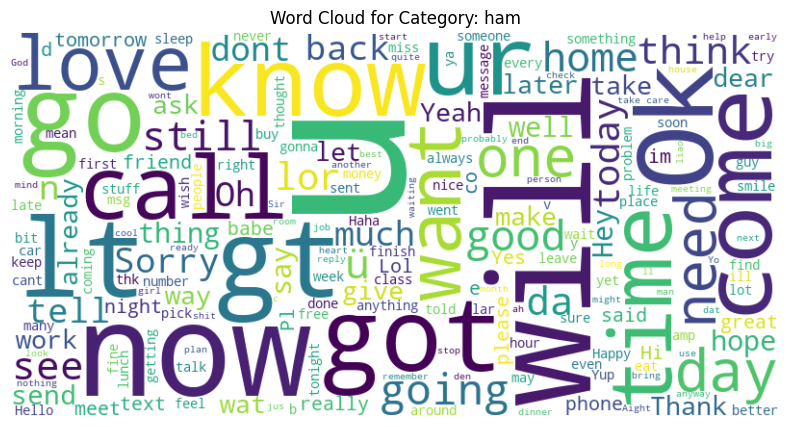

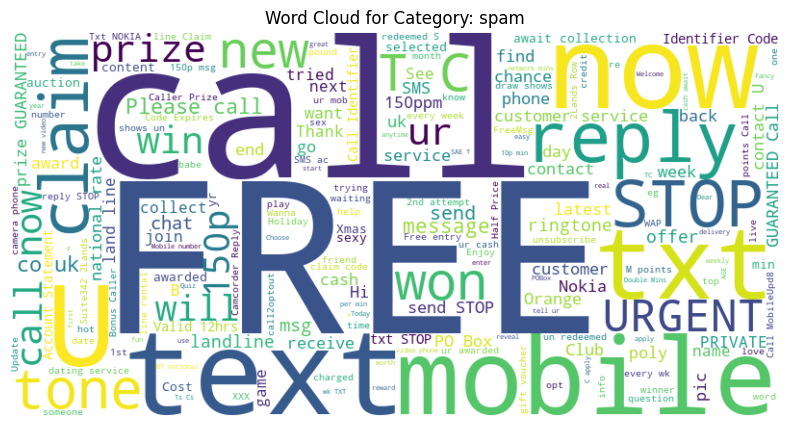

In [17]:
# Iterate through unique categories
for category in df['Category'].unique():
    # Filter the DataFrame for the current category
    filtered_df = df[df['Category'] == category]
    
    # Concatenate all text data for the current category
    text = ' '.join(filtered_df['Message'])
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category: {category}')
    plt.axis('off')
    plt.show()



In [18]:
# Encode Category column 
le = LabelEncoder()
df['Category']=le.fit_transform(df['Category'])
df.head()

,Category,Message,message_length,word_count,char_count,sentiment_polarity,Category_encoded
0,0,"Go until jurong point, crazy.. Available only ...",111,20,111,0.15,0
1,0,Ok lar... Joking wif u oni...,29,6,29,0.50,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,155,0.30,1
3,0,U dun say so early hor... U c already then say...,49,11,49,0.10,0
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,61,0.00,0


# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#12635d;">Preprocessing</p>**
### ***1. Lower Casing***
### ***2. Remove Extra White Spaces***
### ***3. Remove HTML Tags***
### ***4. Remove URLs***
### ***5. Remove Punctuations***
### ***6. Remove Special Characters***
### ***7. Remove Numeric Values***
### ***8. Remove Non-alpha Numeric***
### ***9. Handling ChatWords***
### ***10. Handling StopWords***
### ***11. Handling Emojis***
### ***12. Stemming***

# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#12635d;">LowerCasing Text</p>**

In [19]:
# Convert 'Text' column to lowercase
df['Message'] = df['Message'].str.lower()
df.head()

,Category,Message,message_length,word_count,char_count,sentiment_polarity,Category_encoded
0,0,"go until jurong point, crazy.. available only ...",111,20,111,0.15,0
1,0,ok lar... joking wif u oni...,29,6,29,0.50,0
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,28,155,0.30,1
3,0,u dun say so early hor... u c already then say...,49,11,49,0.10,0
4,0,"nah i don't think he goes to usf, he lives aro...",61,13,61,0.00,0


# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#12635d;">Remove Extra WhiteSpaces</p>**

In [20]:
# Remove extra white spaces from the 'Text' column
df['Message'] = df['Message'].str.strip()
df.head()

,Category,Message,message_length,word_count,char_count,sentiment_polarity,Category_encoded
0,0,"go until jurong point, crazy.. available only ...",111,20,111,0.15,0
1,0,ok lar... joking wif u oni...,29,6,29,0.50,0
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,28,155,0.30,1
3,0,u dun say so early hor... u c already then say...,49,11,49,0.10,0
4,0,"nah i don't think he goes to usf, he lives aro...",61,13,61,0.00,0


# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#12635d;">Remove HTML Tags</p>**

In [21]:
# Function to remove HTML tags from text
def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

# Remove HTML tags from 'Text' column
df['Message'] = df['Message'].apply(remove_html_tags)

In [22]:
df.head()

,Category,Message,message_length,word_count,char_count,sentiment_polarity,Category_encoded
0,0,"go until jurong point, crazy.. available only ...",111,20,111,0.15,0
1,0,ok lar... joking wif u oni...,29,6,29,0.50,0
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,28,155,0.30,1
3,0,u dun say so early hor... u c already then say...,49,11,49,0.10,0
4,0,"nah i don't think he goes to usf, he lives aro...",61,13,61,0.00,0


# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#12635d;">Remove URLs</p>**

In [23]:
# Define a function to remove URLs using regular expressions
def remove_urls(text):
    return re.sub(r'http\S+|www\S+', '', text)

# Apply the function to the 'Text' column
df['Message'] = df['Message'].apply(remove_urls)

In [24]:
df.head()

,Category,Message,message_length,word_count,char_count,sentiment_polarity,Category_encoded
0,0,"go until jurong point, crazy.. available only ...",111,20,111,0.15,0
1,0,ok lar... joking wif u oni...,29,6,29,0.50,0
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,28,155,0.30,1
3,0,u dun say so early hor... u c already then say...,49,11,49,0.10,0
4,0,"nah i don't think he goes to usf, he lives aro...",61,13,61,0.00,0


# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#12635d;">Remove Punctuations</p>**


In [25]:
string.punctuation

# Define the punctuation characters to remove
punctuation = string.punctuation

In [26]:
# Function to remove punctuation from text
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punctuation))

# Apply remove_punctuation function to 'Text' column
df['Message'] = df['Message'].apply(remove_punctuation)

In [27]:
df.head()

,Category,Message,message_length,word_count,char_count,sentiment_polarity,Category_encoded
0,0,go until jurong point crazy available only in ...,111,20,111,0.15,0
1,0,ok lar joking wif u oni,29,6,29,0.50,0
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,28,155,0.30,1
3,0,u dun say so early hor u c already then say,49,11,49,0.10,0
4,0,nah i dont think he goes to usf he lives aroun...,61,13,61,0.00,0


# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#12635d;">Remove Special Characters</p>**

In [28]:
def remove_special_characters(text):
    # Define the pattern to match special characters
    pattern = r'[^a-zA-Z0-9\s]'  # Matches any character that is not alphanumeric or whitespace
    
    # Replace special characters with an empty string
    clean_text = re.sub(pattern, '', text)
    
    return clean_text

# Apply the function to the 'Message' column
df['Message'] = df['Message'].apply(remove_special_characters)

# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#12635d;">Remove Numeric Values</p>**

In [29]:
# Function to remove numeric values from text
def remove_numeric(text):
    return re.sub(r'\d+', '', text)

# Apply the function to the "Message" column
df['Message'] = df['Message'].apply(remove_numeric)

In [30]:
df.head()

,Category,Message,message_length,word_count,char_count,sentiment_polarity,Category_encoded
0,0,go until jurong point crazy available only in ...,111,20,111,0.15,0
1,0,ok lar joking wif u oni,29,6,29,0.50,0
2,1,free entry in a wkly comp to win fa cup final...,155,28,155,0.30,1
3,0,u dun say so early hor u c already then say,49,11,49,0.10,0
4,0,nah i dont think he goes to usf he lives aroun...,61,13,61,0.00,0


# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#12635d;">Remove Non-alpha Numeric</p>**

In [31]:
 # Define a function to remove non-alphanumeric characters
def remove_non_alphanumeric(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

# Apply the function to the "Message" column
df['Message'] = df['Message'].apply(remove_non_alphanumeric)

# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#12635d;">Handling ChatWords</p>**

In [32]:
# Define a dictionary of chat word mappings
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

In [33]:
# Function to replace chat words with their full forms
def replace_chat_words(text):
    words = text.split()
    for i, word in enumerate(words):
        if word.lower() in chat_words:
            words[i] = chat_words[word.lower()]
    return ' '.join(words)

# Apply replace_chat_words function to 'Text' column
df['Message'] = df['Message'].apply(replace_chat_words)


# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#12635d;">Handling StopWords</p>**

In [34]:
# Get English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Function to remove stop words from text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply remove_stopwords function to 'Text' column
df['Message'] = df['Message'].apply(remove_stopwords)

# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#12635d;">Handling Emojis</p>**

In [35]:
# Function to remove emojis from text
def remove_emojis(text):
    return emoji.demojize(text)

# Apply remove_emojis function to 'Text' column
df['Message'] = df['Message'].apply(remove_emojis)

# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#12635d;">Stemming</p>**
## ***Introduction:***
### ***`Stemming` is a text processing technique used in natural language processing `(NLP)` to reduce words to their root or base form, known as the stem. The goal of stemming is to normalize words with similar meanings so that variations of the same word are treated as identical. This helps improve text analysis and information retrieval tasks by reducing the complexity of the vocabulary.***

### ***`For example`, stemming would convert words like "running," "runs," and "ran" to the common stem "run." Similarly, "fishes" and "fishing" would both be stemmed to "fish." While stemming can sometimes result in non-real words, it is a simple and efficient method for preprocessing text data in NLP tasks.***

In [36]:
# Initialize the Porter Stemmer
porter_stemmer = PorterStemmer()

# Apply stemming
df['Message_stemmed'] = df['Message'].apply(lambda x: ' '.join([porter_stemmer.stem(word) for word in x.split()]))

# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#12635d;">Model Building</p>**

# **<p style="font-family:newtimeroman;font-size:140%;text-align:center;color:#12635d;">Text Vectorization</p>**
## ***Code Working:***
## ***Initialize CountVectorizer:***
### ***- The code initializes a `CountVectorizer` object named `cv`.***
### ***- CountVectorizer is a `text vectorization` method that converts a collection of text documents into a matrix of token counts.***
## ***Fit CountVectorizer on X:***
### ***- The `fit_transform()` method of CountVectorizer is applied to the 'Message_stemmed' column of the DataFrame (`df`).***
### ***- This method learns the vocabulary dictionary and returns a `document-term matrix` representing the token counts for each document.***
### ***- The resulting matrix is converted to a dense NumPy array using `toarray()`.***
### ***- The `transformed features` are stored in the variable `X`.***
### ***- The target variable 'Category' is stored in the variable `y`.***

In [52]:
# Intlize CountVectorizer
cv = CountVectorizer()

# Fitting CountVectorizer on X 
X = cv.fit_transform(df['Message_stemmed']).toarray()
y = df['Category']


# **<p style="font-family:newtimeroman;font-size:140%;text-align:center;color:#12635d;">Train Test Split</p>**

In [38]:
# Train Test Split 
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

# **<p style="font-family:newtimeroman;font-size:140%;text-align:center;color:#12635d;">Call, Fit And Predict The Models</p>**
## ***Code Working:***
### ***1. Logistic Regression with tuned parameters:***
### ***- The code initializes a Logistic Regression model with specified hyperparameters (C=0.1, solver='liblinear', max_iter=500).***
### ***- It fits the model on the training data (X_train, y_train) using the `fit()` method.***
### ***- Predictions are made on the test data (X_test) using the trained model, and the results are stored in `lr_pred`.***

### ***2. Multinomial Naive Bayes with tuned parameters:***
### ***- The code initializes a Multinomial Naive Bayes model with the alpha hyperparameter set to 0.1.***
### ***- It fits the model on the training data.***
### ***- Predictions are made on the test data, and the results are stored in `mnb_pred`.***
### ***3. Gaussian Naive Bayes:***
### ***- The code initializes a Gaussian Naive Bayes model.***
### ***- It fits the model on the training data.***
### ***- Predictions are made on the test data, and the results are stored in `gnb_pred`.***
### ***4. Support Vector Machines (SVM) with tuned parameters:***
### ***- The code initializes an SVM model with specified hyperparameters (C=10.0, kernel='rbf', gamma='auto').***
### ***- It fits the model on the training data.***
### ***- Predictions are made on the test data, and the results are stored in `svm_pred`.***
### ***5. Decision Trees with tuned parameters:***
### ***- The code initializes a Decision Tree Classifier with specified hyperparameters (max_depth=10, min_samples_split=5).***
### ***- It fits the model on the training data.***
### ***- Predictions are made on the test data, and the results are stored in `dt_pred`.***
### ***6. Random Forests with tuned parameters:***
### ***- The code initializes a Random Forest Classifier with specified hyperparameters (n_estimators=100, max_depth=15, min_samples_split=10).***
### ***- It fits the model on the training data.***
### ***- Predictions are made on the test data, and the results are stored in `rf_pred`.***
### ***7. Gradient Boosting Classifier with tuned parameters:***
### ***- The code initializes a Gradient Boosting Classifier with specified hyperparameters (n_estimators=100, learning_rate=0.05, max_depth=5).***
### ***- It fits the model on the training data.***
### ***- Predictions are made on the test data, and the results are stored in `gb_pred`.***
### ***8. XGBoost Classifier with tuned parameters:***
### ***- The code initializes an XGBoost Classifier with specified hyperparameters (n_estimators=100, learning_rate=0.1, max_depth=5).***
### ***- It fits the model on the training data.***
### ***- Predictions are made on the test data, and the results are stored in `xgb_pred`.***

In [39]:
# Logistic Regression with tuned parameters
lr_model = LogisticRegression(C=0.1, solver='liblinear', max_iter=500)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Multinomial Naive Bayes with tuned parameters
mnb_model = MultinomialNB(alpha=0.1)
mnb_model.fit(X_train, y_train)
mnb_pred = mnb_model.predict(X_test)

# Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_pred = gnb_model.predict(X_test)

# Support Vector Machines (SVM) with tuned parameters
svm_model = SVC(C=10.0, kernel='rbf', gamma='auto')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

# Decision Trees with tuned parameters
dt_model = DecisionTreeClassifier(max_depth=10, min_samples_split=5)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# Random Forests with tuned parameters
rf_model = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=10)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Gradient Boosting Classifier with tuned parameters
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=5)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# XGBoost Classifier with tuned parameters
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)


# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#12635d;">Models Evaluation</p>**

In [40]:
# Calculate accuracy, precision and recall for each model
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred, average='weighted')
lr_recall = recall_score(y_test, lr_pred, average='weighted')
lr_conf_matrix = confusion_matrix(y_test, lr_pred)

mnb_accuracy = accuracy_score(y_test, mnb_pred)
mnb_precision = precision_score(y_test, mnb_pred, average='weighted')
mnb_recall = recall_score(y_test, mnb_pred, average='weighted')
mnb_conf_matrix = confusion_matrix(y_test, mnb_pred)

gnb_accuracy = accuracy_score(y_test, gnb_pred)
gnb_precision = precision_score(y_test, gnb_pred, average='weighted')
gnb_recall = recall_score(y_test, gnb_pred, average='weighted')
gnb_conf_matrix = confusion_matrix(y_test, gnb_pred)

svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')
svm_conf_matrix = confusion_matrix(y_test, svm_pred)

dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred, average='weighted')
dt_recall = recall_score(y_test, dt_pred, average='weighted')
dt_conf_matrix = confusion_matrix(y_test, dt_pred)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='weighted')
rf_recall = recall_score(y_test, rf_pred, average='weighted')
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred, average='weighted')
gb_recall = recall_score(y_test, gb_pred, average='weighted')
gb_conf_matrix = confusion_matrix(y_test, gb_pred)

xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred, average='weighted')
xgb_recall = recall_score(y_test, xgb_pred, average='weighted')
xgb_conf_matrix = confusion_matrix(y_test, xgb_pred)

# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#12635d;">Print The Results</p>**

In [41]:
# Print precision, recall, and accuracy for each model
print("Logistic Regression:")
print(f"The accuracy score of Logistic Regression is {lr_accuracy}, The Precision Score is {lr_precision},The Recall Score is {lr_recall}")
print(f"The Confusion matrix is \n{lr_conf_matrix}")
print("\n")

print("Multinomial Naive Bayes:")
print(f"The accuracy score of MultinomialNB is {mnb_accuracy}, The Precision Score is {mnb_precision},The Recall Score is {mnb_recall}")
print(f"The Confusion matrix is \n{mnb_conf_matrix}")
print("\n")

print("Gaussian Naive Bayes:")
print(f"The accuracy score of GaussianNB is {gnb_accuracy}, The Precision Score is {gnb_precision},The Recall Score is {gnb_recall}")
print(f"The Confusion matrix is \n{gnb_conf_matrix}")
print("\n")

print("SVM:")
print(f"The accuracy score of SVC is {svm_accuracy}, The Precision Score is {svm_precision},The Recall Score is {svm_recall}")
print(f"The Confusion matrix is \n{svm_conf_matrix}")
print("\n")

print("Decision Trees:")
print(f"The accuracy score of Decision Tree classifier is {dt_accuracy}, The Precision Score is {dt_precision},The Recall Score is {dt_recall}")
print(f"The Confusion matrix is \n{dt_conf_matrix}")
print("\n")

print("Random Forests:")
print(f"The accuracy score of Random Forest classifier is {rf_accuracy}, The Precision Score is {rf_precision},The Recall Score is {rf_recall}")
print(f"The Confusion matrix is \n{rf_conf_matrix}")
print("\n")

print("Gradient Boosting Classifier:")
print(f"The accuracy score of Gradient Boosting Classifier is {gb_accuracy}, The Precision Score is {gb_precision},The Recall Score is {gb_recall}")
print(f"The Confusion matrix is \n{gb_conf_matrix}")
print("\n")

print("XGBoost Classifier:")
print(f"The accuracy score of XGBoost Classifier is {xgb_accuracy}, The Precision Score is {xgb_precision},The Recall Score is {xgb_recall}")
print(f"The Confusion matrix is \n{xgb_conf_matrix}")
print("\n")

Logistic Regression:
The accuracy score of Logistic Regression is 0.9718992248062015, The Precision Score is 0.9724528699938659,The Recall Score is 0.9718992248062015
The Confusion matrix is 
[[895   1]
 [ 28 108]]


Multinomial Naive Bayes:
The accuracy score of MultinomialNB is 0.9563953488372093, The Precision Score is 0.9624374427464473,The Recall Score is 0.9563953488372093
The Confusion matrix is 
[[859  37]
 [  8 128]]


Gaussian Naive Bayes:
The accuracy score of GaussianNB is 0.8691860465116279, The Precision Score is 0.9179176426684793,The Recall Score is 0.8691860465116279
The Confusion matrix is 
[[776 120]
 [ 15 121]]


SVM:
The accuracy score of SVC is 0.8953488372093024, The Precision Score is 0.9066061336051144,The Recall Score is 0.8953488372093024
The Confusion matrix is 
[[896   0]
 [108  28]]


Decision Trees:
The accuracy score of Decision Tree classifier is 0.9525193798449613, The Precision Score is 0.9508431332297135,The Recall Score is 0.9525193798449613
The Con

In [42]:
print(f"Logistic Regression is doing really well with an accuracy of {lr_accuracy} and precision of {lr_precision}, showing that it's the top performer in our email spam detection task.")

Logistic Regression is doing really well with an accuracy of 0.9718992248062015 and precision of 0.9724528699938659, showing that it's the top performer in our email spam detection task.


# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#12635d;">Storing The Results in DataFrame</p>**
## ***Code Working:***
### ***- We create a dictionary named `evaluation_data` to store the evaluation results of different models. This dictionary contains three keys: 'Model', 'Accuracy', and 'Precision'.***
### ***- Under the 'Model' key, we list the names of the models used for evaluation, including Logistic Regression, MultinomialNB, GaussianNB, Decision Tree, SVM, Random Forest, Gradient Boosting, and XGBoost.***
### ***- Under the 'Accuracy' key, we list the accuracy scores of each model. These accuracy scores are obtained from previously calculated variables such as `lr_accuracy`, `mnb_accuracy`, etc.***
### ***- Under the 'Precision' key, we list the precision scores of each model. These precision scores are obtained from previously calculated variables such as `lr_precision`, `mnb_precision`, etc.***
### ***- After creating the `evaluation_data` dictionary, we convert it into a DataFrame named `evaluation_df` using the `pd.DataFrame()` function from the pandas library.***
### ***- We then sort the DataFrame `evaluation_df` based on the 'Accuracy' and 'Precision' columns in descending order using the `sort_values()` method.***
### ***- Finally, we print the sorted DataFrame to display the evaluation results, showing the models with the highest accuracy and precision at the top.***

In [43]:
# Create a dictionary with evaluation results
evaluation_data = {
    'Model': ['Logistic Regression', 'MultinomialNB', 'GaussianNB', 'Decision Tree', 'SVM', 'Random Forest', 'Gradient Boosting', 'XGBoost'],
    'Accuracy': [lr_accuracy, mnb_accuracy, gnb_accuracy, dt_accuracy, svm_accuracy, rf_accuracy, gb_accuracy, xgb_accuracy],
    'Precision': [lr_precision, mnb_precision, gnb_precision, dt_precision, svm_precision, rf_precision, gb_precision, xgb_precision],
   }

# Create a DataFrame
evaluation_df = pd.DataFrame(evaluation_data)

# Sort the DataFrame based on Accuracy and Precision columns in descending order
evaluation_df = evaluation_df.sort_values(by=['Accuracy', 'Precision'], ascending=False)

# Display the sorted DataFrame
print(evaluation_df)


                 Model  Accuracy  Precision
0  Logistic Regression  0.971899   0.972453
7              XGBoost  0.963178   0.962678
6    Gradient Boosting  0.962209   0.961283
1        MultinomialNB  0.956395   0.962437
3        Decision Tree  0.952519   0.950843
5        Random Forest  0.915698   0.923159
4                  SVM  0.895349   0.906606
2           GaussianNB  0.869186   0.917918


# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#12635d;">Visualizing The Results</p>**
## ***Code Working:***
### ***- We define a list of models (`Models`) containing the names of the models used for classification, including Logistic Regression, Multinomial Naive Bayes, Gaussian Naive Bayes, Decision Tree, SVM, Random Forest, Gradient Boosting, and XGBoost.***
### ***- Two lists, `Accuracy` and `Precision`, are created to store the corresponding accuracy and precision scores of each model.***
### ***- Using Matplotlib, we create a new figure with a size of 10x6 inches for plotting.***
### ***- We plot the accuracy scores of each model using blue circles as markers (`marker='o'`), solid lines (`linestyle='-'`), and the color blue (`color='b'`). The `plot()` function is used for this purpose.***
### ***- Similarly, we plot the precision scores of each model using red crosses as markers (`marker='x'`), dashed lines (`linestyle='--'`), and the color red (`color='r'`).***
### ***- We add labels to the x-axis (`xlabel`) and y-axis (`ylabel`) indicating the model and score, respectively.***
### ***- A title is set for the plot using the `title()` function.***
### ***- We rotate the x-axis labels by 45 degrees using `xticks(rotation=45)` to avoid overlap.***
### ***- A legend is added to the plot to distinguish between accuracy and precision scores `(plt.legend())`.***
### ***- Finally, we display the grid lines `(plt.grid(True))`, adjust the layout to prevent overlapping elements `(plt.tight_layout())`, and show the plot using `plt.show()`.***

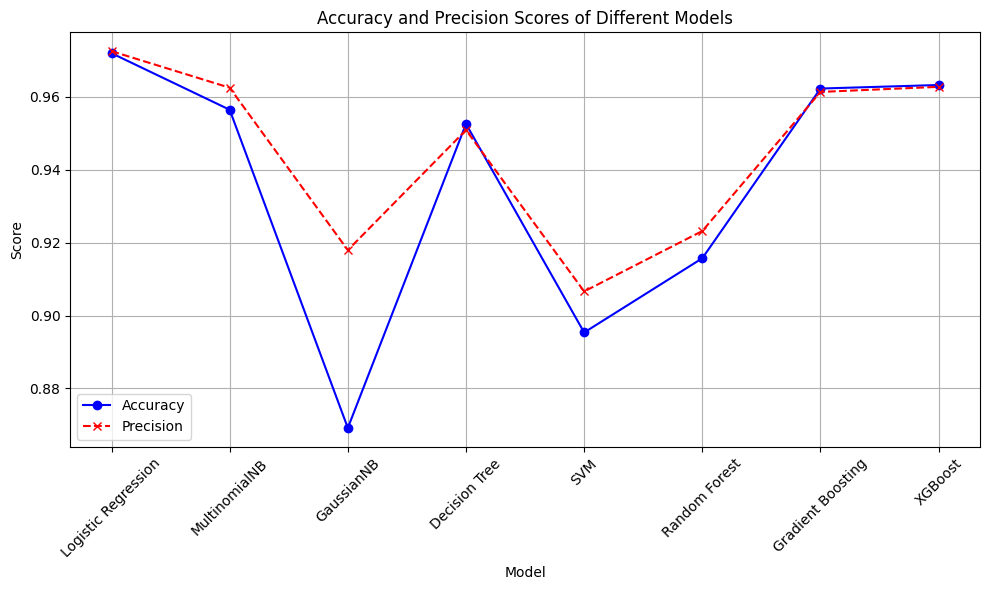

In [44]:
# Define the models and their corresponding accuracy and precision scores
Models = ['Logistic Regression', 'MultinomialNB', 'GaussianNB', 'Decision Tree', 'SVM', 'Random Forest', 'Gradient Boosting', 'XGBoost']
Accuracy = [lr_accuracy, mnb_accuracy, gnb_accuracy, dt_accuracy, svm_accuracy, rf_accuracy, gb_accuracy, xgb_accuracy]
Precision = [lr_precision, mnb_precision, gnb_precision, dt_precision, svm_precision, rf_precision, gb_precision, xgb_precision]

# Plotting
plt.figure(figsize=(10, 6))

# Plot accuracy scores
plt.plot(Models, Accuracy, marker='o', linestyle='-', color='b', label='Accuracy')

# Plot precision scores
plt.plot(Models, Precision, marker='x', linestyle='--', color='r', label='Precision')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Accuracy and Precision Scores of Different Models')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#12635d;">Training Model</p>**

# load dataset

In [70]:
df = pd.read_csv("spam email dataset.csv", encoding='ISO-8859-1')[["Category", "Message"]]
df.columns = ["label", "text"]

# Data Processing

In [71]:
df["label"] = df["label"].map({"ham": 0, "spam": 1})
df.drop_duplicates(inplace=True)

# Text Vectorization

In [72]:
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df["text"])
y = df["label"]


# Train Test-Split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [74]:
model = MultinomialNB()
model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


 # Save Model and Vectorizer

In [75]:
joblib.dump(model, "models/spam_classifier_model.pkl")
joblib.dump(tfidf, "models/tfidf_vectorizer.pkl")

['models/tfidf_vectorizer.pkl']

Accuracy Score: 0.9689922480620154

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       1.00      0.76      0.87       136

    accuracy                           0.97      1032
   macro avg       0.98      0.88      0.92      1032
weighted avg       0.97      0.97      0.97      1032



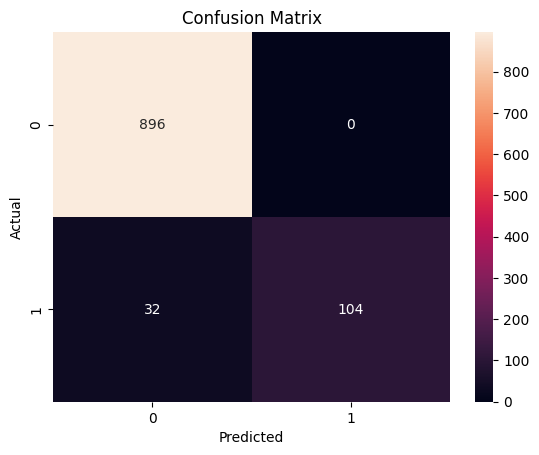

In [76]:
y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# for model os

In [79]:
import os
import joblib

# Create folder if it doesn't exist
os.makedirs("models", exist_ok=True)

# Save model and vectorizer
joblib.dump(model, "models/spam_classifier_model.pkl")
joblib.dump(tfidf, "models/tfidf_vectorizer.pkl")

['models/tfidf_vectorizer.pkl']

# Test on Custom Input

In [83]:
def predict_spam(text):
    vect_text = tfidf.transform([text])
    prediction = model.predict(vect_text)
    return "🚫 SPAM Message Detected!" if prediction[0] == 1 else "✅ Not Spam (HAM)."

# Test the custom function

In [84]:
print(predict_spam("Congratulations! You have won a free ticket. Reply to claim."))
print(predict_spam("Are we still meeting today?"))

🚫 SPAM Message Detected!
✅ Not Spam (HAM).


# **<p style="font-family:newtimeroman;font-size:200%;text-align:center;color:#12635d;">THE END</p>**
## ***Thank you for exploring this notebook!*** 